<a href="https://colab.research.google.com/github/dscoool/datastructure/blob/main/Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#다익스트라
### Dijkstra - 최단 경로 알고리즘

최단 경로 알고리즘은 지하철 노선도, 네비게이션 등 다방면에 사용되는 알고리즘입니다. 이번 시간에는 Python을 이용해 하나의 시작 정점으로 부터 모든 다른 정점까지의 최단 경로를 찾는 최단 경로 알고리즘인 다익스트라(dijkstra) 알고리즘에 대해서 알아 보려고 합니다.



## 목차

1.   최단 경로 알고리즘의 아이디어
2.   사전 배경 지식
3.   코드 구현




## 1. 최단 경로 알고리즘의 아이디어
최단 경로 알고리즘의 아이디어는 다음과 같습니다. 자료 구조로는 graph 를 사용하며, 노드와 가중치를 가진 간선 을 이용하여 실제 거리를 표현합니다. 알고리즘을 간단하게 설명 하자면, 다음과 같습니다.

출발 노드와, 도착 노드를 설정
알고 있는 모든 거리 값을 부여
출발 노드부터 시작하여, 방문하지 않은 인접 노드를 방문, 거리를 계산한 다음, 현재 알고있는 거리보다 짧으면 해당 값으로 갱신한다.
현재 노드에 인접한 모든 미방문 노드까지의 거리를 계산했다면, 현재 노드는 방문한 것이므로, 미방문 집합에서 제거한다.
도착 노드가 미방문 노드 집합에서 벗어나면, 알고리즘을 종료한다.




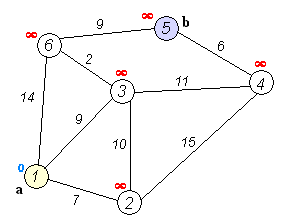

## 2. 사전 배경 지식
다익스트라 알고리즘을 실행 하는 중에는 방문하지 않은 인접 노드를 방문하는 부분이 있습니다. 이 부분에서 우선순위 큐를 사용 하면, 지금까지 발견된 가장 짧은 거리의 노드에 대해서 먼저 계산할 수 있으며, 더 긴 거리로 계산 되었을 시 스킵 또한 가능합니다.

우선순위 큐는 heapq 모듈을 이용해 구현 할 수 있습니다.

https://justkode.kr/python/pygorithm-2 (heapq 부분 참조)

## 3. 코드 구현

출발 노드와, 도착 노드를 설정 (전체 거리를 알고 싶을 때는, 출발 노드만 설정 하여도 무방)
알고 있는 모든 거리 값을 부여 (Python에서는 dictionary 객체를 이용하여 graph를 표현 할 수 있다.)

In [4]:
graph = {
    'A': {'B': 8, 'C': 1, 'D': 2},
    'B': {},
    'C': {'B': 5, 'D': 2},
    'D': {'E': 3, 'F': 5},
    'E': {'F': 1},
    'F': {'A': 5}
}

출발 노드부터 시작하여, 방문하지 않은 인접 노드를 방문, 거리를 계산한 다음, 현재 알고있는 거리보다 짧으면 해당 값으로 갱신한다.
현재 노드에 인접한 모든 미방문 노드까지의 거리를 계산했다면, 현재 노드는 방문한 것이므로, 미방문 집합에서 제거한다.

In [7]:
import heapq  # 우선순위 큐 구현을 위함

def dijkstra(graph, start): # start = 'A', 'B', 'C', .... start점으로부터의 거리를 출력
  distances = {node: float('inf') for node in graph}  # start로 부터의 거리 값을 저장하기 위함
  distances[start] = 0  # 시작 값은 0이어야 함
  queue = []
  heapq.heappush(queue, [distances[start], start])  # 시작 노드부터 탐색 시작 하기 위함.
  while queue:  # queue에 남아 있는 노드가 없으면 끝
    current_distance, current_destination = heapq.heappop(queue)  # 탐색 할 노드, 거리를 가져옴.

    if distances[current_destination] < current_distance:  # 기존에 있는 거리보다 길다면, 볼 필요도 없음
      continue

    for new_destination, new_distance in graph[current_destination].items():
      distance = current_distance + new_distance  # 해당 노드를 거쳐 갈 때 거리
      if distance < distances[new_destination]:  # 알고 있는 거리 보다 작으면 갱신
        distances[new_destination] = distance
        heapq.heappush(queue, [distance, new_destination])  # 다음 인접 거리를 계산 하기 위해 큐에 삽입
    print(queue)

  return distances

## 실행 결과

In [8]:
print(dijkstra(graph, 'A'))


[[1, 'C'], [8, 'B'], [2, 'D']]
[[2, 'D'], [8, 'B'], [6, 'B']]
[[5, 'E'], [7, 'F'], [6, 'B'], [8, 'B']]
[[6, 'B'], [6, 'F'], [8, 'B'], [7, 'F']]
[[6, 'F'], [7, 'F'], [8, 'B']]
[[7, 'F'], [8, 'B']]
{'A': 0, 'B': 6, 'C': 1, 'D': 2, 'E': 5, 'F': 6}


######  Reference: https://justkode.kr/algorithm/python-dijkstra/
